In [ ]:
!pip install --upgrade --no-cache-dir gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=069c474f7884a07d0cefc9b8b34e3a054a5292da645442d3c4b5422fbfba3a87
  Stored in directory: /tmp/pip-ephem-wheel-cache-noz4vowm/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.2.2
    Uninstalling gdown-4.2.2:
      Successfully uninstalled gdown-4.2.2


In [ ]:
! gdown --id 1RwO05N7cTzOWDnL748KNw3q6b62UWLfm

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1RwO05N7cTzOWDnL748KNw3q6b62UWLfm
To: /content/train.ft.txt.bz2
100% 464M/464M [00:07<00:00, 66.1MB/s]


In [ ]:
! gdown --id 1wsqrvQ4tzJFIPrTyji-3DsnKGwTLauFz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wsqrvQ4tzJFIPrTyji-3DsnKGwTLauFz
To: /content/test.ft.txt.bz2
100% 52.7M/52.7M [00:01<00:00, 34.7MB/s]


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

        
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import bz2
import pandas as pd
import re 
import numpy as np

In [ ]:
#Import Dataset
train_file = bz2.BZ2File('train.ft.txt.bz2')
test_file = bz2.BZ2File('test.ft.txt.bz2')

# ***Reading Dataset***

In [ ]:
#Reading Data set
train_file = train_file.readlines()
test_file = test_file.readlines()


In [ ]:
print("Number of training reivews: " + str(len(train_file)))
print("Number of test reviews: " + str(len(test_file)))

Number of training reivews: 3600000
Number of test reviews: 400000


In [ ]:
#training on the first 10000 reviews in the  dataset
num_train = 100000
#Using 2000 reviews from test set
num_test = 20000#Using 200,000 reviews from test set

train_file = [x.decode('utf-8') for x in train_file[:num_train]]
test_file = [x.decode('utf-8') for x in test_file[:num_test]]

In [ ]:
#Extracing Labels and Review from traing Dataset
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file]
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file]

In [ ]:
#Extracing Labels and Review from test Dataset
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file]

# ***Creating Data Frame***

In [ ]:
train = pd.DataFrame({'text':train_sentences,'label':train_labels})
test=pd.DataFrame({'text':test_sentences,'label':test_labels})

In [ ]:
train.head()

,text,label
0,stuning even for the non-gamer: this sound tra...,1
1,the best soundtrack ever to anything.: i'm rea...,1
2,amazing!: this soundtrack is my favorite music...,1
3,excellent soundtrack: i truly like this soundt...,1
4,"remember, pull your jaw off the floor after he...",1


In [ ]:
train.describe()

,label
count,100000.000000
mean,0.512670
std,0.499842
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
train['number_of_words'] = train['text'].str.lower().str.split().apply(len)
train.head()

,text,label,number_of_words
0,stuning even for the non-gamer: this sound tra...,1,80
1,the best soundtrack ever to anything.: i'm rea...,1,97
2,amazing!: this soundtrack is my favorite music...,1,129
3,excellent soundtrack: i truly like this soundt...,1,118
4,"remember, pull your jaw off the floor after he...",1,87


In [ ]:
test['number_of_words'] = test['text'].str.lower().str.split().apply(len)
test.head()

,text,label,number_of_words
0,great cd: my lovely pat has one of the great v...,1,106
1,one of the best game music soundtracks - for a...,1,148
2,batteries died within a year ...: i bought thi...,0,60
3,"works fine, but maha energy is better: check o...",1,37
4,great for the non-audiophile: reviewed quite a...,1,69


# *Data Visulaization*

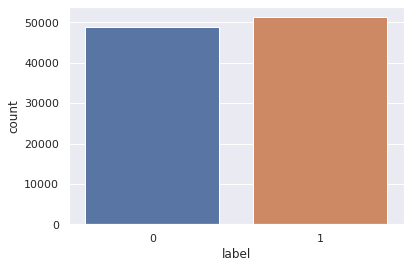

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="label", data=train)

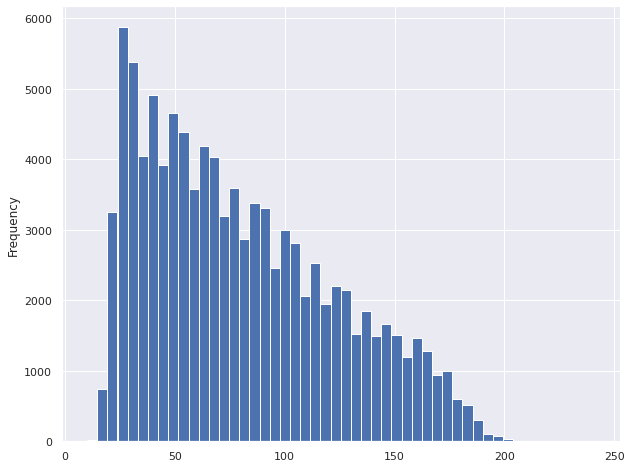

In [ ]:
train['number_of_words'].plot(bins=50, kind='hist',figsize = (10,8)) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78a19ad4d0>,
      dtype=object)

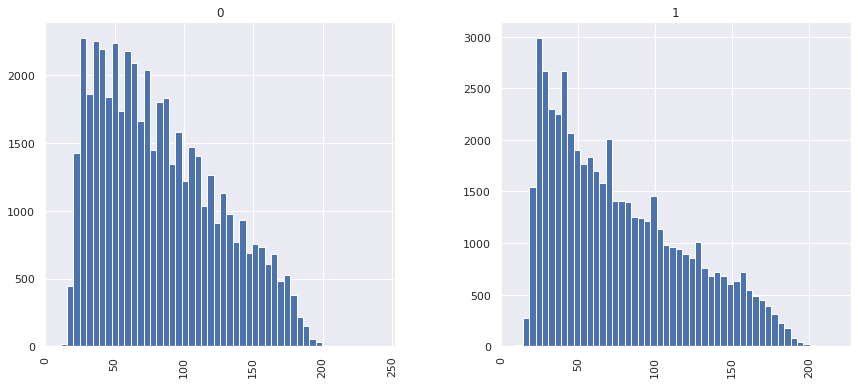

In [ ]:
train.hist(column='number_of_words', by='label',
           bins=50,figsize=(14,6))

# *Data Preprocessing*

In [ ]:
import re

import nltk

def remove_url(text):
     url=re.compile(r"https?://\S+|www\.\S+")
     return url.sub(r" ",text)

def remove_html(text):
  cleanr = re.compile('<.*?>')
  return cleanr.sub(r" ",text)



def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output


import string
def remove_punc(text):
   table=str.maketrans(' ',' ',string.punctuation)
   return text.translate(table)



nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words("english"))
 
def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train['text']=train.text.map(lambda x:remove_url(x))
train['text']=train.text.map(lambda x:remove_html(x))
train['text']=train.text.map(lambda x:remove_punc(x))
train['text']=train['text'].map(remove_num)
train['text']=train['text'].map(remove_stopword)

In [ ]:
test['text']=test.text.map(lambda x:remove_url(x))
test['text']=test.text.map(lambda x:remove_html(x))
test['text']=test.text.map(lambda x:remove_punc(x))
test['text']=test['text'].map(remove_num)
test['text']=test['text'].map(remove_stopword)

In [ ]:

import nltk
nltk.download('punkt')
def Stemming(text):
   stem=[]
   from nltk.corpus import stopwords
   from nltk.stem import SnowballStemmer
  #is based on The Porter Stemming Algorithm
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

train['text']=train['text'].map(Stemming)

In [ ]:

test['text']=test['text'].map(Stemming)

In [ ]:
import tensorflow as tf


#  ***Word Embedding***

In [ ]:
max_length=100
vocab_size=12000
embedding_dim=64
trunc_type="post"
oov_tok="<OOV>"
padding_type="post"
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train['text'])

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train['text'])
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(test['text'])
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
training_padded[1]

array([  25,  805,   51,  181,   52,    6,   86,   49,   45,   25,  113,
        805,  483,  309,  101,   49, 2068,  161,    1,    1,    1, 1069,
        735,   43, 1571,   52,  111,   29,  173,  315, 1829,    1,  132,
       2734,  160, 7108,  112,   45,   31,   23,   37,   21,   75,    3,
         90,   11,  100,   93, 2076,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [ ]:
print(training_sequences[0])

[1, 20, 1, 74, 193, 173, 1072, 1, 317, 22, 11, 1222, 20, 57, 348, 9334, 113, 43, 67, 113, 1, 1298, 113, 51, 67, 25, 43, 60, 179, 2987, 1976, 72, 11607, 788, 2075, 692, 741, 3169, 11, 459, 125, 245, 111]


In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM,GRU
from keras.preprocessing import sequence
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score    
from tensorflow.python.keras import models, layers, optimizers   
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, SpatialDropout1D
from keras.layers.wrappers import Bidirectional
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

# *Bidirectional LSTM Model*

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(256, dropout=0.2)))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           768000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 64)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 512)              657408    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 1,425,921
Trainable params: 1,425,921
Non-

In [ ]:
adam=Adam(lr=0.0001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:

model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'] )

In [ ]:

history=model.fit(training_padded,train['label'], epochs=15, batch_size=256,verbose = 1,callbacks = [EarlyStopping(monitor='val_accuracy', patience=2)],validation_data=(testing_padded,test['label']))

Epoch 1/15
391/391 [==============================] - 1088s 3s/step - loss: 0.5217 - accuracy: 0.7226 - val_loss: 0.3620 - val_accuracy: 0.8501
Epoch 2/15
391/391 [==============================] - 1172s 3s/step - loss: 0.3406 - accuracy: 0.8575 - val_loss: 0.3208 - val_accuracy: 0.8662
Epoch 3/15
391/391 [==============================] - 1176s 3s/step - loss: 0.2983 - accuracy: 0.8772 - val_loss: 0.3046 - val_accuracy: 0.8717
Epoch 4/15
391/391 [==============================] - 1165s 3s/step - loss: 0.2770 - accuracy: 0.8875 - val_loss: 0.2940 - val_accuracy: 0.8765
Epoch 5/15
391/391 [==============================] - 1172s 3s/step - loss: 0.2595 - accuracy: 0.8956 - val_loss: 0.2883 - val_accuracy: 0.8798
Epoch 6/15
391/391 [==============================] - 1169s 3s/step - loss: 0.2486 - accuracy: 0.9003 - val_loss: 0.2829 - val_accuracy: 0.8823
Epoch 7/15
391/391 [==============================] - 1161s 3s/step - loss: 0.2398 - accuracy: 0.9043 - val_loss: 0.2800 - val_accuracy:

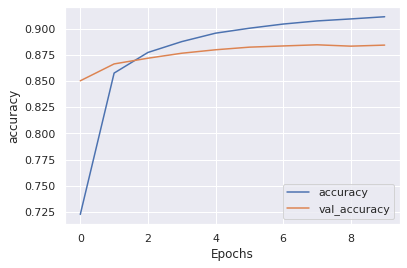

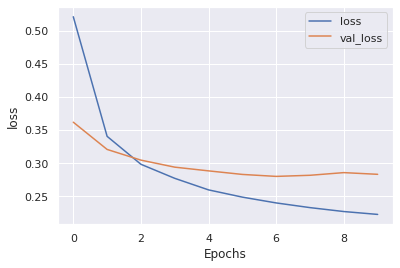

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
def Review(sentence):
   sequences = tokenizer.texts_to_sequences(sentence)
   padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

   prob=model.predict(padded)
   if prob>=0.8:
     print(5)
   elif prob>=0.6:
     print(4)
   elif prob>=0.4:
     print(3) 
   elif prob>=0.2:
     print(2)   
   else:
       print(1)

In [ ]:
sentence=['Good Product + exactly in size']
Review(sentence)

5


In [ ]:
sentence=['this is worst thing donot buy it']
Review(sentence)

1


In [ ]:
# Predicting the Test set results
y_pred = model.predict(testing_padded)
y_pred = (y_pred > 0.5)
X_test=testing_padded
y_test=test['label']

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.884200
Precision: 0.868239
Recall: 0.911592
F1 score: 0.889388
ROC AUC: 0.883601
[[8373 1413]
 [ 903 9311]]


In [ ]:
#Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      9786
           1       0.87      0.91      0.89     10214

    accuracy                           0.88     20000
   macro avg       0.89      0.88      0.88     20000
weighted avg       0.89      0.88      0.88     20000



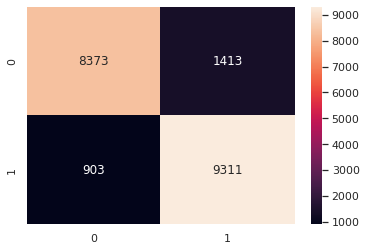

In [ ]:
#Confusion Matrix
import seaborn as sns
sns.heatmap(matrix,annot=True,fmt='')

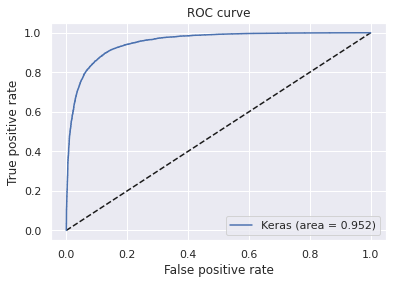

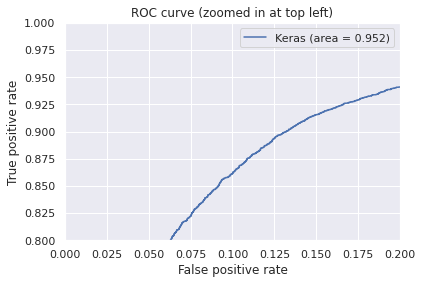

In [ ]:
#ROC Curve

from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()